In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import librosa
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

In [4]:
datapath = 'speech_commands'
noise_path = os.path.join(datapath, '_background_noise_')
sr = 16000
X_raw = []
labels = []

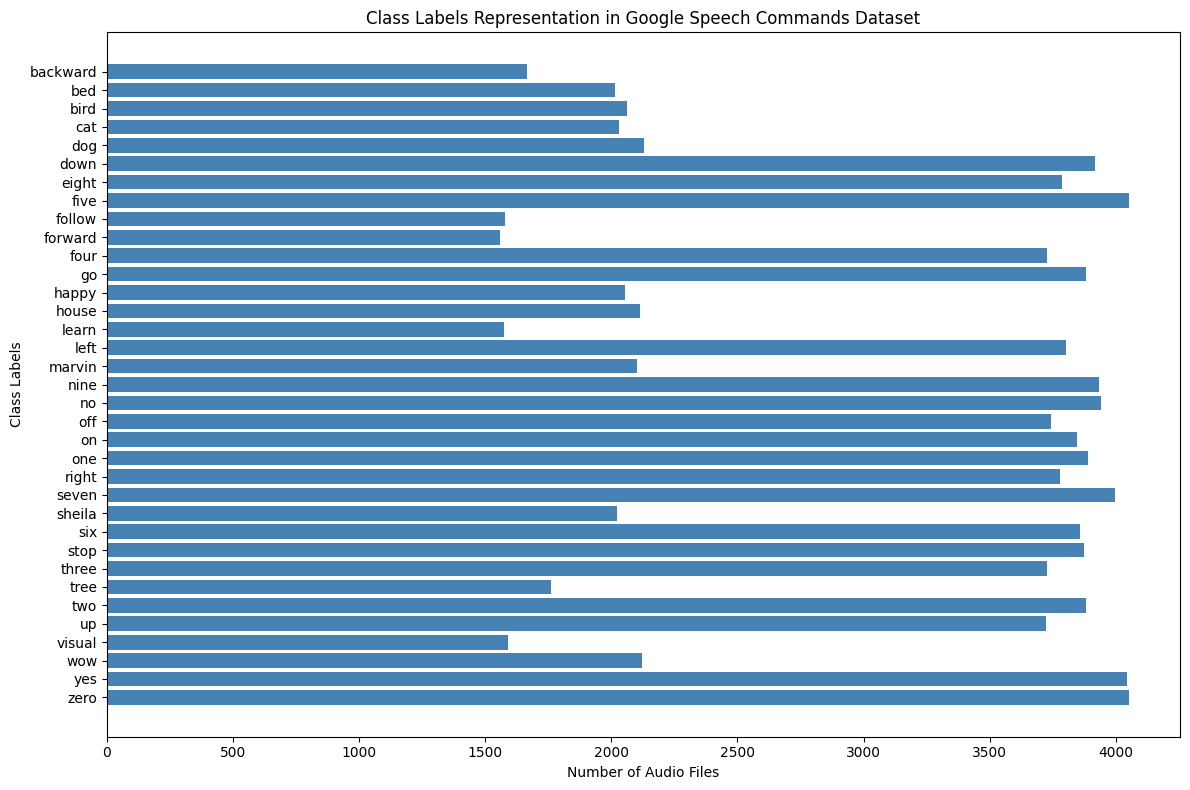

In [5]:
class_labels = [d for d in os.listdir(datapath) if os.path.isdir(os.path.join(datapath, d)) and d != '_background_noise_']

label_counts = {label: len(os.listdir(os.path.join(datapath, label))) for label in class_labels}

sorted_labels = sorted(label_counts.items(), key=lambda x: (-x[1], x[0]))

sorted_labels, sorted_counts = zip(*sorted_labels)

plt.figure(figsize=(12, 8))
plt.barh(sorted_labels, sorted_counts, color='steelblue')
plt.xlabel('Number of Audio Files')
plt.ylabel('Class Labels')
plt.title('Class Labels Representation in Google Speech Commands Dataset')
plt.tight_layout()
plt.show()

In [8]:
def ensure_audio_length(signal, sr):
    if len(signal) < sr:
        signal = np.pad(signal, (0, sr - len(signal)), 'constant')
    else:
        signal = signal[:sr]
    return signal

def process_audio(file_path, sr):
    signal, _ = librosa.load(file_path, sr=sr)
    signal = ensure_audio_length(signal, sr)
    return signal

def split_data(feature_sets, test_size, validation_size):
    x = feature_sets['features']
    y = feature_sets['targets']

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size)
    x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size=validation_size)


    return x_train, y_train, x_test, y_test, x_validation, y_validation

def load_noises(noise_path, sr=16000):
    noises = []
    for file in os.listdir(noise_path):
        file_path = os.path.join(noise_path, file)
        if file_path.endswith('.wav'):
            noise, _ = librosa.load(file_path, sr=sr)
            noises.append(noise)
    return noises

def add_noise_to_audio(audio, noise):
    noise_start = np.random.randint(0, len(noise) - 16000)
    noise = noise[noise_start:noise_start + len(audio)]
    noise_level = 0.1
    augmented_audio = audio + noise_level * noise
    return augmented_audio

def create_mfcc_features(x, sr, flag, noises):
    mfcc_features = []
    for signal in x:
        if flag == 'train':
            if random.random() < 0.5:
                noise = random.choice(noises)
                signal = add_noise_to_audio(signal, noise)
        mfcc = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=13).T
        mfcc = np.expand_dims(mfcc, -1)
        mfcc_features.append(mfcc)
    print('Done for ' + flag + ' set.')
    return np.array(mfcc_features)

In [9]:
for dir_name in os.listdir(datapath):
    if os.path.isdir(os.path.join(datapath, dir_name)) and not dir_name == "_background_noise_":
        print(dir_name)
        for file in os.listdir(os.path.join(datapath, dir_name)):
            file_path = os.path.join(datapath, dir_name, file)
            signal = process_audio(file_path, sr)
            X_raw.append(signal)
            labels.append(dir_name)
            
X_raw = np.array(X_raw)
labels = np.array(labels)

label_binarizer = LabelBinarizer()
y = label_binarizer.fit_transform(labels)

x_train_wav, y_train, x_test_wav, y_test, x_validation_wav, y_validation = split_data({'features': X_raw, 'targets': y}, 0.1, 0.1)

backward
bed
bird
cat
dog
down
eight
five
follow
forward
four
go
happy
house
learn
left
marvin
nine
no
off
on
one
right
seven
sheila
six
stop
three
tree
two
up
visual
wow
yes
zero


In [12]:
noises = load_noises(noise_path)
x_train = create_mfcc_features(x_train_wav, sr, 'train', noises)
x_validation = create_mfcc_features(x_validation_wav, sr, 'validation', noises)
x_test = create_mfcc_features(x_test_wav, sr, 'test', noises)

Done for train set.
Done for validation set.
Done for test set.


In [14]:
np.save('preprocessed_audio_data/x_train.npy', x_train)
np.save('preprocessed_audio_data/x_validation.npy', x_validation)
np.save('preprocessed_audio_data/x_test.npy', x_test)

np.save('preprocessed_audio_data/y_train.npy', y_train)
np.save('preprocessed_audio_data/y_validation.npy', y_validation)
np.save('preprocessed_audio_data/y_test.npy', y_test)